In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.1-cp36-none-any.whl size=5972 sha256=e6fe96cea6ae7efc9449a64357c55f1279c9894a996ac6a7e3403f2cfb47d364
  Stored in directory: /root/.cache/pip/wheels/7b/2a/35/c0c3749c1a36d4f454ea22d8396e1b854b86340d63cbbb7949
Successfully built apyori


In [0]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set(style="darkgrid")
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/burger-star.csv')
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


In [0]:
df.tail()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
307,21:47,Beef burger,1,8,Mineral water,1,10,0,TUNAI
308,21:50,Beef burger,1,7,Mineral water,1,5,1,TUNAI
309,21:53,Beef burger,1,11,Mineral water,1,9,0,DANA
310,21:55,Beef burger,1,2,Coffe,3,2,0,DANA
311,21:57,Beef burger,1,1,None,0,1,0,TUNAI


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
Timestamp        312 non-null object
Type Burger      312 non-null object
Code Burger      312 non-null int64
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Code Drink       312 non-null int64
Amount Drink     312 non-null int64
Gender           312 non-null int64
Payment          312 non-null object
dtypes: int64(5), object(4)
memory usage: 22.0+ KB


In [0]:
df.isnull().sum()

Timestamp        0
Type Burger      0
Code Burger      0
Amount Burger    0
Type Drink       0
Code Drink       0
Amount Drink     0
Gender           0
Payment          0
dtype: int64

In [0]:
df.shape

(312, 9)

In [0]:
df = df.drop(columns=["Code Burger", "Code Drink"])

In [0]:
df.shape

(312, 7)

In [0]:
df['Hours'] = df['Timestamp'].str[:2] 

In [0]:
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Hours
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,10
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,10
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,10
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,10
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,10


In [0]:
df_10 = df[df["Hours"] == "10"]
df_10.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Hours
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,10
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,10
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,10
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,10
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,10


In [0]:
df3 = df[['Type Burger','Type Drink','Hours']]

In [0]:
df3.head()

,Type Burger,Type Drink,Hours
0,Beef burger,Mineral water,10
1,Cheese burger,Coke,10
2,Double cheese burger,Mineral water,10
3,Chicken burger,Coffe,10
4,Cheese burger,Coke,10


In [0]:
df3['Hours']=pd.to_numeric(df3['Hours'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
arr = []

for i in range(len(df3['Hours'])):
  if df3['Hours'][i]<=13:
    arr.append('Noon')
  elif df3['Hours'][i]<=17:
    arr.append('Afternoon')
  else:
    arr.append('Night')

In [0]:
df3['Times'] = arr 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df3.groupby(['Hours']).size()

Hours
10    29
11    40
12    25
13    24
14    23
15    21
16    19
17    25
18    32
19    29
20    21
21    24
dtype: int64

In [0]:
df_ganteng = df3[['Type Burger','Type Drink','Times']]

In [0]:
df_ganteng.head()

,Type Burger,Type Drink,Times
0,Beef burger,Mineral water,Noon
1,Cheese burger,Coke,Noon
2,Double cheese burger,Mineral water,Noon
3,Chicken burger,Coffe,Noon
4,Cheese burger,Coke,Noon


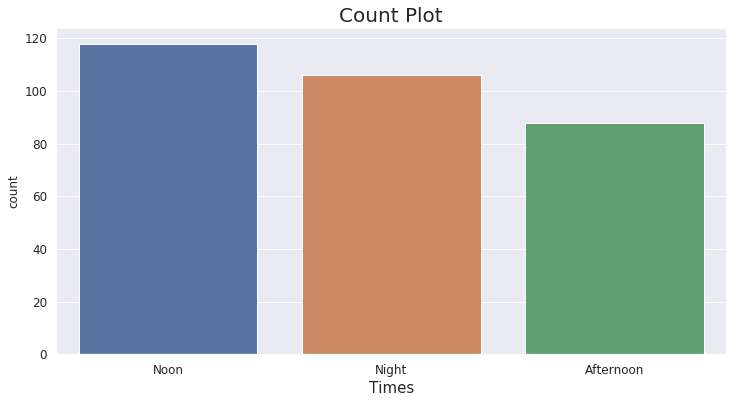

In [0]:
fig = plt.figure(figsize=(12,6))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df3, x='Times', order = df3['Times'].value_counts().index)
ax.set_xlabel('Times', fontsize = 15)
ax.tick_params(labelsize=12)

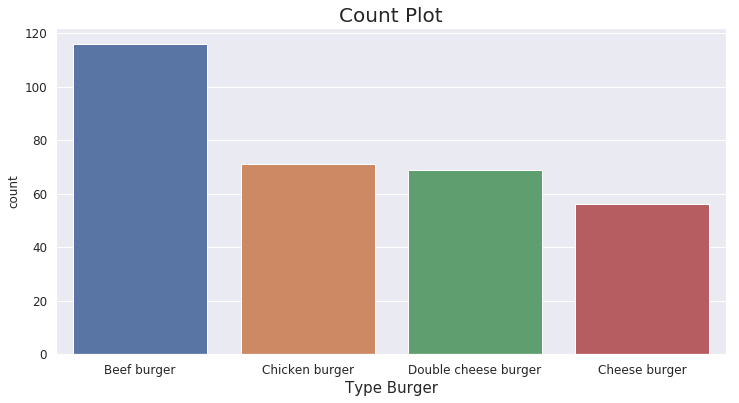

In [0]:
fig = plt.figure(figsize=(12,6))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df, x='Type Burger', order = df['Type Burger'].value_counts().index)
ax.set_xlabel('Type Burger', fontsize = 15)
ax.tick_params(labelsize=12)

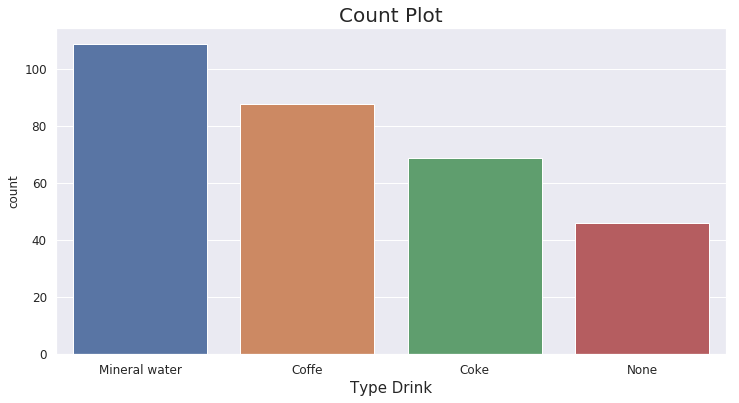

In [0]:
fig = plt.figure(figsize=(12,6))
plt.title('Count Plot',fontsize = 20)
ax=sns.countplot(data=df, x='Type Drink', order = df['Type Drink'].value_counts().index)
ax.set_xlabel('Type Drink', fontsize = 15)
ax.tick_params(labelsize=12)

In [0]:
df_ganteng['Type Drink'].unique()

array(['Mineral water', 'Coke', 'Coffe', 'None'], dtype=object)

In [0]:
df_ganteng.shape

(312, 3)

In [0]:
records = []
for i in range(len(df_ganteng)):
    records.append([str(df_ganteng.values[i,j]) for j in range(0, 3)])

In [0]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.7, min_lift=1, min_length=1)
association_results = list(association_rules)

In [0]:
association_results

[RelationRecord(items=frozenset({'Coke', 'Cheese burger'}), support=0.1794871794871795, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cheese burger'}), items_add=frozenset({'Coke'}), confidence=1.0, lift=4.521739130434783), OrderedStatistic(items_base=frozenset({'Coke'}), items_add=frozenset({'Cheese burger'}), confidence=0.8115942028985508, lift=4.521739130434783)]),
 RelationRecord(items=frozenset({'None', 'Chicken burger'}), support=0.11217948717948718, ordered_statistics=[OrderedStatistic(items_base=frozenset({'None'}), items_add=frozenset({'Chicken burger'}), confidence=0.7608695652173914, lift=3.343539497856706)]),
 RelationRecord(items=frozenset({'Coke', 'Cheese burger', 'Afternoon'}), support=0.04487179487179487, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cheese burger', 'Afternoon'}), items_add=frozenset({'Coke'}), confidence=1.0, lift=4.521739130434783), OrderedStatistic(items_base=frozenset({'Coke', 'Afternoon'}), items_add=frozenset({'Cheese b

In [0]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items1 = [x for x in pair]
    
    if len(items1) == 2:
        print("Rule: " + items1[0] + " -> " + items1[1])
    else:
        print("Rule: " + items1[0] + " -> " + items1[1] + " -> " + items1[2])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Coke -> Cheese burger
Support: 0.1794871794871795
Confidence: 1.0
Lift: 4.521739130434783
Rule: None -> Chicken burger
Support: 0.11217948717948718
Confidence: 0.7608695652173914
Lift: 3.343539497856706
Rule: Coke -> Cheese burger -> Afternoon
Support: 0.04487179487179487
Confidence: 1.0
Lift: 4.521739130434783
Rule: None -> Chicken burger -> Afternoon
Support: 0.035256410256410256
Confidence: 0.7857142857142857
Lift: 3.4527162977867203
Rule: Night -> Coke -> Cheese burger
Support: 0.0673076923076923
Confidence: 1.0
Lift: 4.521739130434783
Rule: Noon -> Coke -> Cheese burger
Support: 0.0673076923076923
Confidence: 1.0
Lift: 4.521739130434783
Rule: Night -> Chicken burger -> None
Support: 0.035256410256410256
Confidence: 0.7333333333333333
Lift: 3.2225352112676053
Rule: Noon -> None -> Chicken burger
Support: 0.041666666666666664
Confidence: 0.7647058823529411
Lift: 3.3603976801988398
